In [11]:
!nvidia-smi

Tue Oct 28 14:29:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


In [5]:
import os
from google.colab import userdata
from roboflow import download_dataset
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

dataset = download_dataset('https://universe.roboflow.com/nasaspaceflight/rocket-detect/dataset/36', 'yolov8')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rocket-Detect-36 in yolov8:: 100%|██████████| 24094/24094 [00:02<00:00, 11809.73it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 231MB/s]
New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Rocket-Detect-36/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1761662276.c7f327c5c917.1398.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


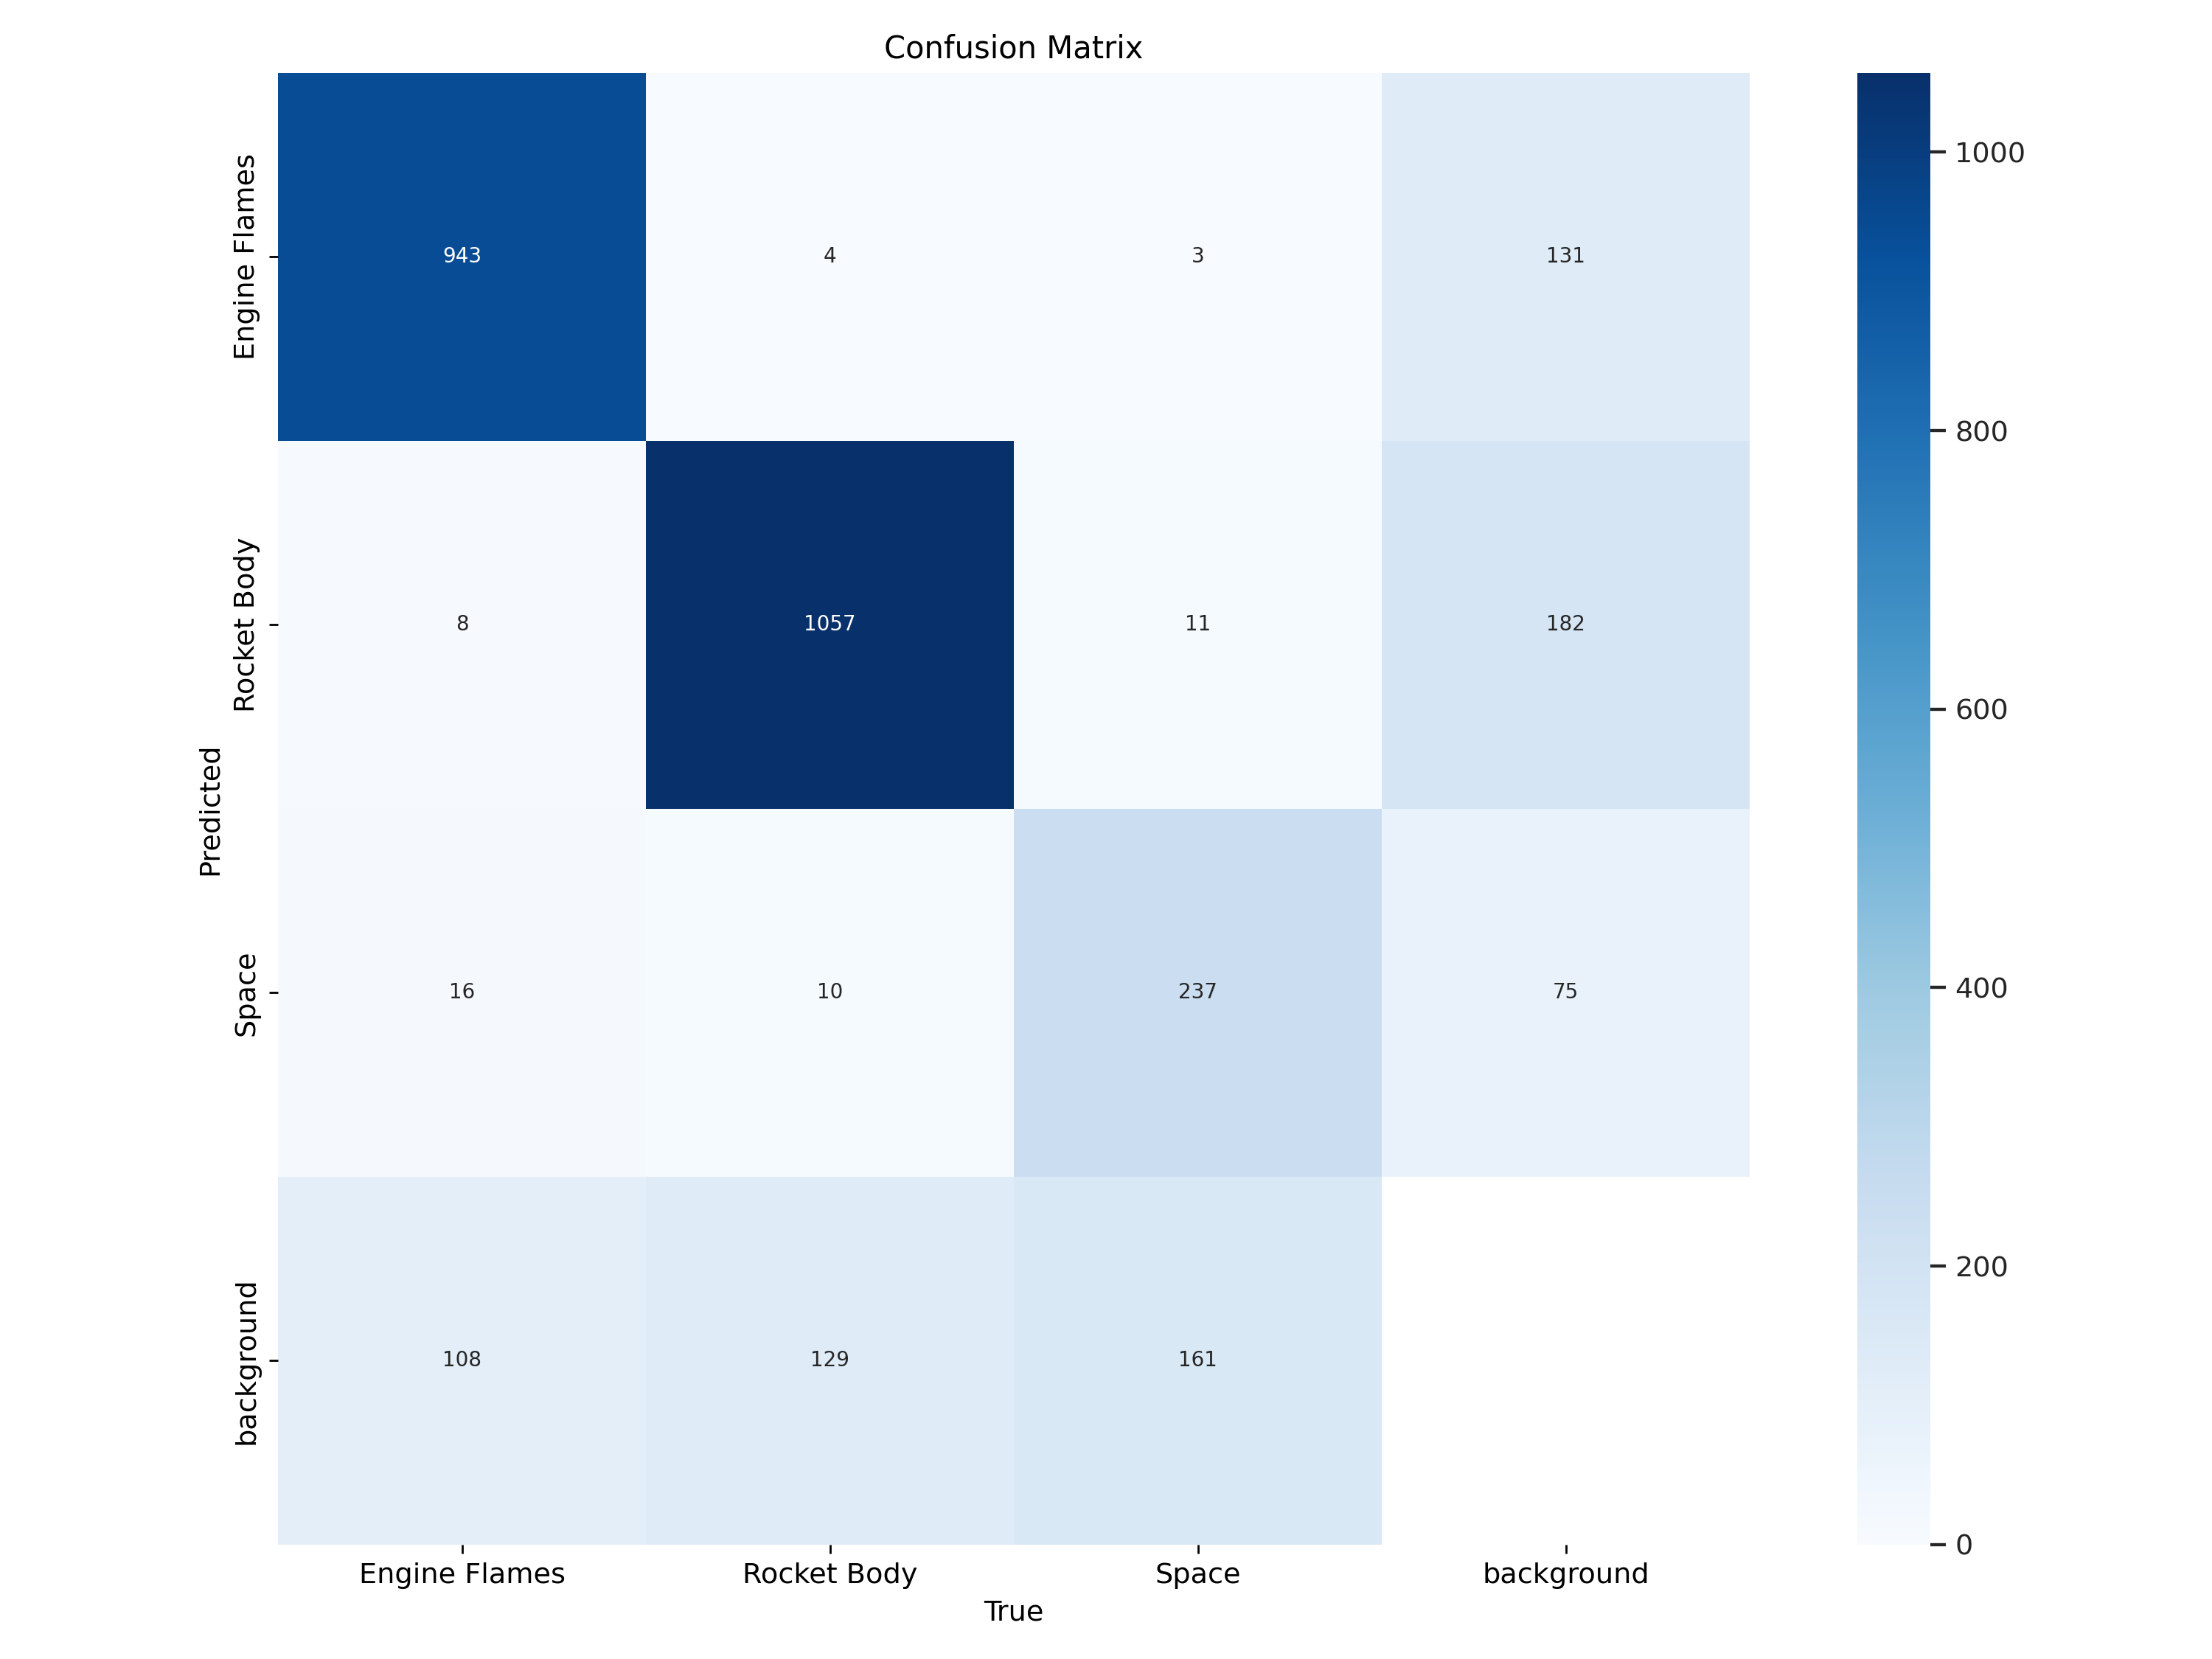

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

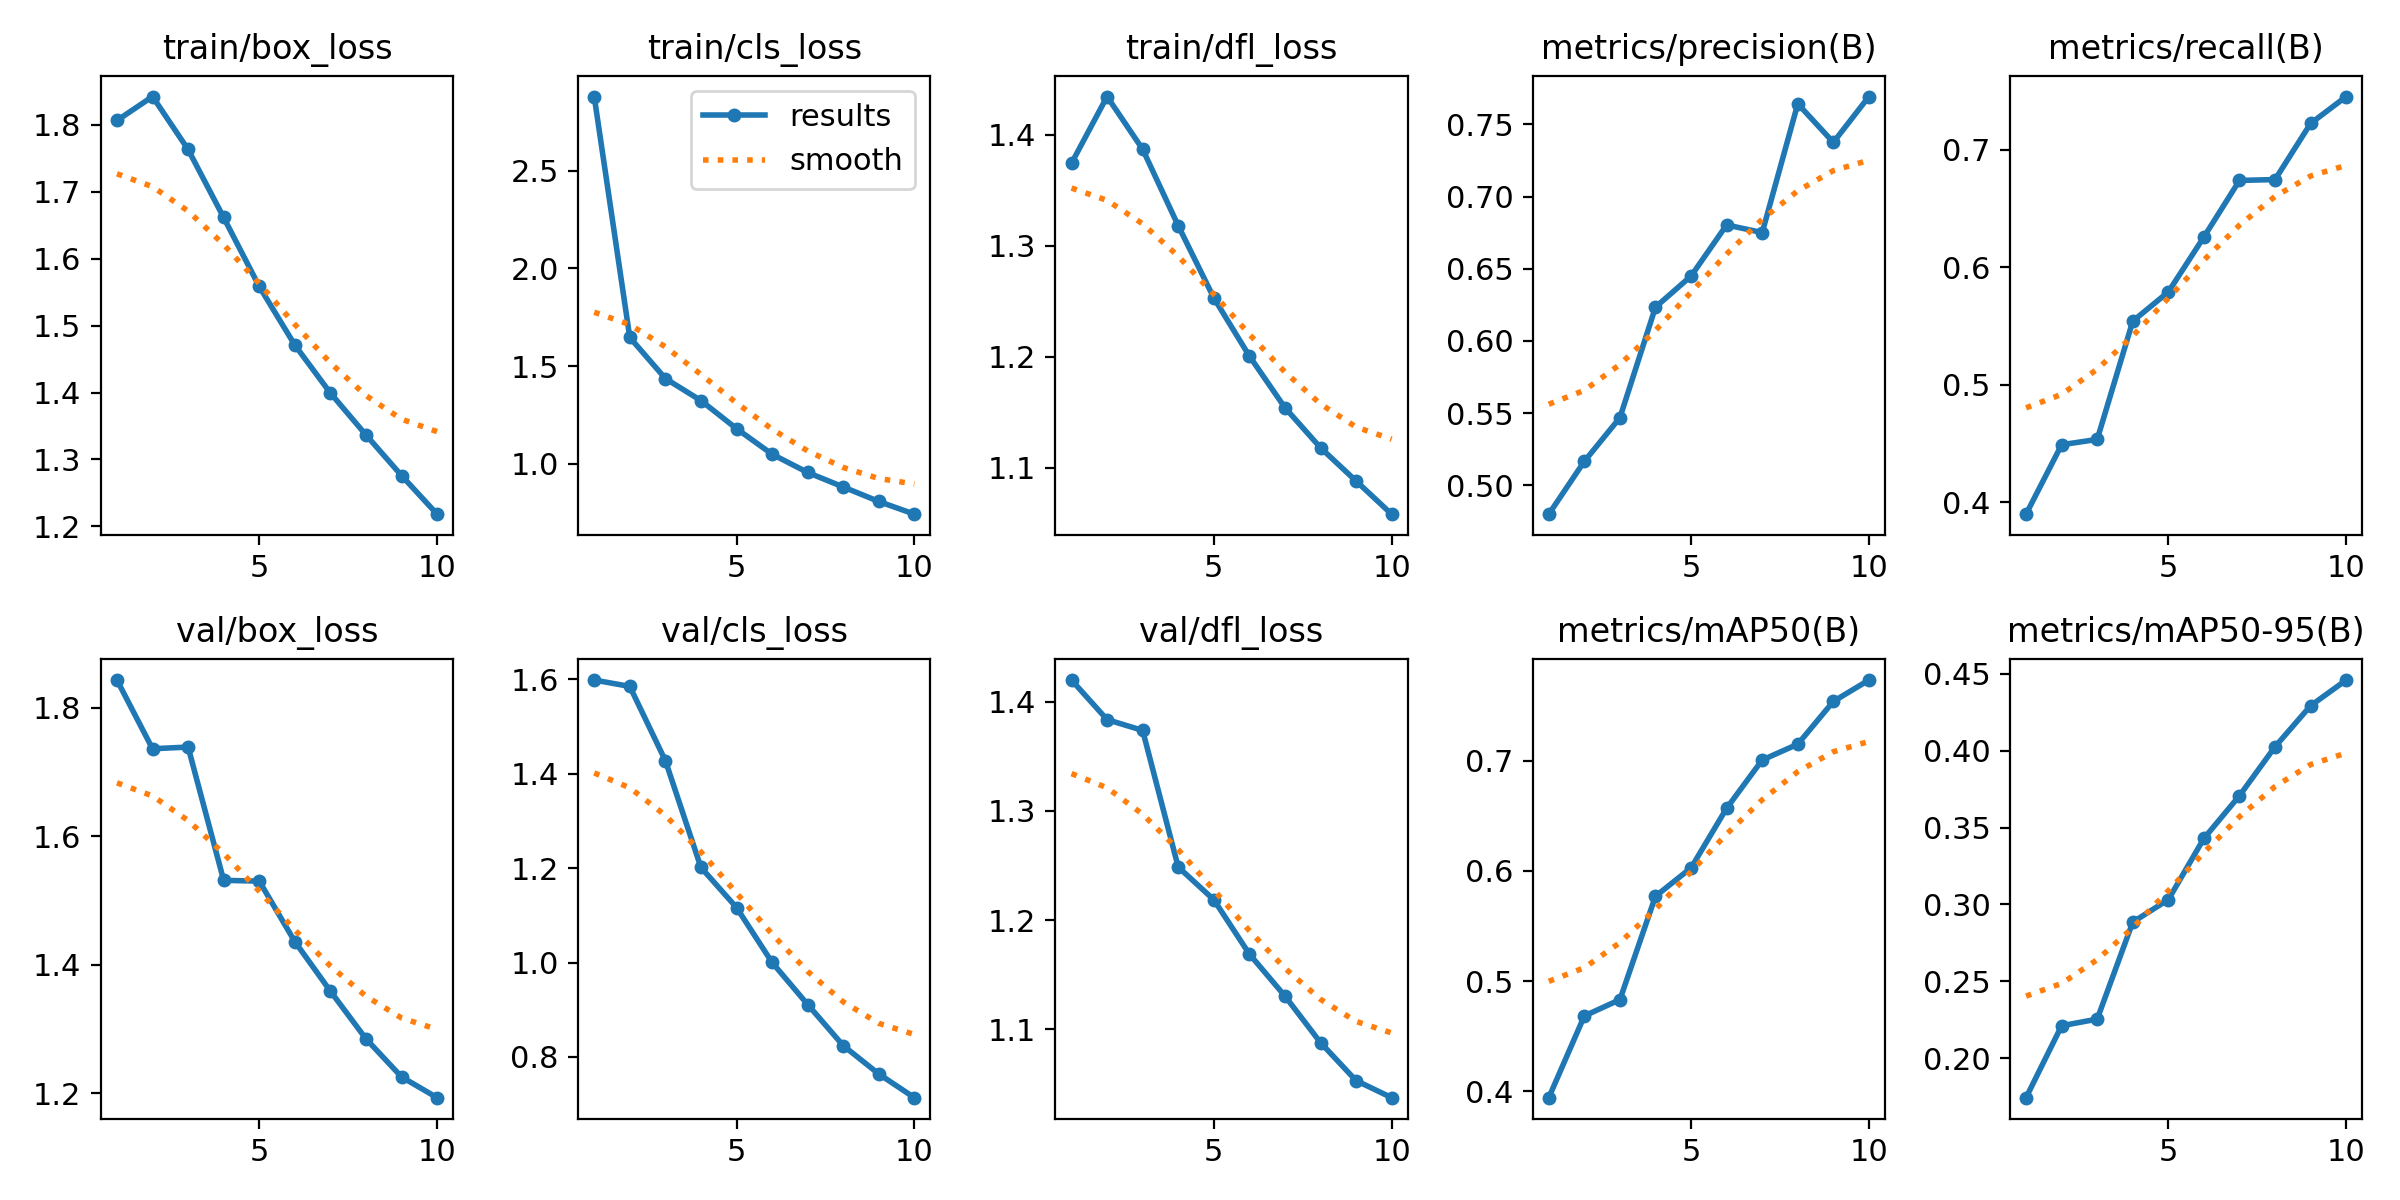

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/1259 /content/Rocket-Detect-36/test/images/102_jpg.rf.e37e312a785f91c1b87574001d401b29.jpg: 384x640 1 Engine Flames, 51.2ms
image 2/1259 /content/Rocket-Detect-36/test/images/105_jpg.rf.035ca2d61490b4ebd57006558a410c54.jpg: 384x640 1 Rocket Body, 10.8ms
image 3/1259 /content/Rocket-Detect-36/test/images/107_jpg.rf.4599b408d30f4cb6a41e04eabf421020.jpg: 384x640 1 Rocket Body, 10.8ms
image 4/1259 /content/Rocket-Detect-36/test/images/108_jpg.rf.13f5a4491b163062bc8c373b775581e9.jpg: 384x640 2 Spaces, 10.8ms
image 5/1259 /content/Rocket-Detect-36/test/images/10_jpg.rf.48c5273280ed88ada16bd2c9528fd73e.jpg: 384x640 1 Rocket Body, 10.8ms
image 6/1259 /content/Rocket-Detect-36/test/images/10_jpg.rf.970c933a4373608e51fadd46474e5e0a.jpg: 384x640 1 Engine Flames, 1 Rocket Body, 10.8ms
image 7/1259 /content/Rocket-Detect-36/te

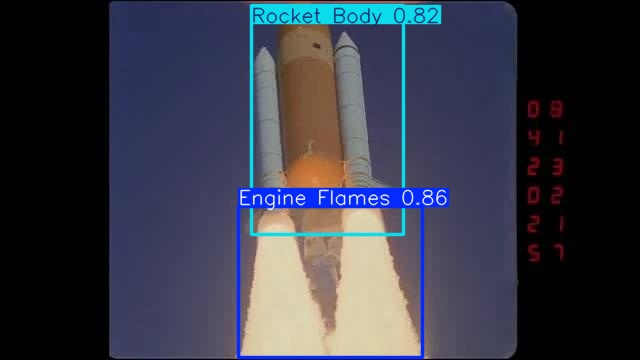

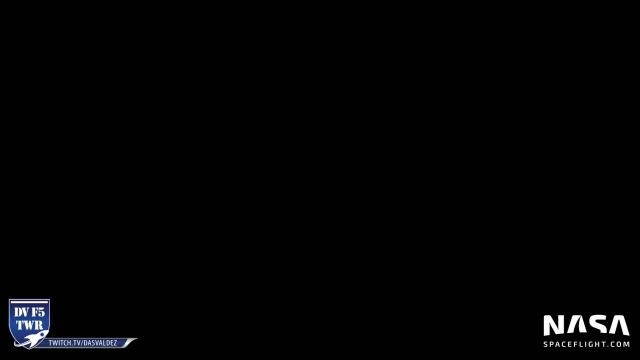

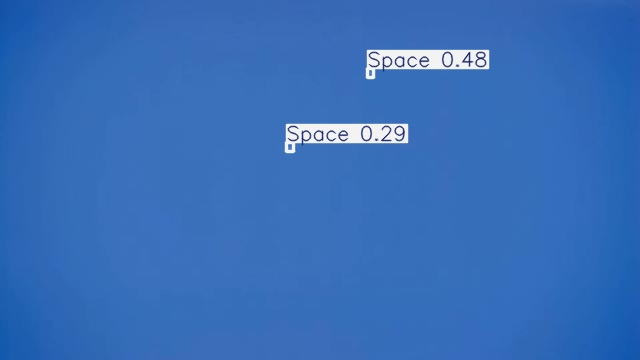

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")